<a href="https://colab.research.google.com/github/kiselpd/HW4_ML/blob/main/dbscan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('seaborn-talk')
plt.rcParams['figure.figsize'] = (15,10)

In [2]:
#for my GoogleDisk
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/GoogleColab/HW4

Mounted at /content/drive
/content/drive/MyDrive/GoogleColab/HW4


In [4]:
df = pd.read_csv('./data/news.csv', encoding='utf8')
df.head()

,text,date,event,class
0,В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИС...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
1,"Lenta.co, Москва, 14 января 2017 СИТУАЦИЯ С П...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
2,"Аргументы и Факты (aif.ru), Москва, 14 января...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
3,"Google Новости ТОП, Москва, 14 января 2017 АК...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
4,"Газета.Ru, Москва, 13 января 2017 В МОСКОВСКО...",2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ


In [6]:
df.loc[:, 'class'].value_counts()

Важные мировые события                           403
Внутренняя политика РФ                           364
Внутренняя политика РФ: оппозиция                277
Теракты                                          200
Международные отношения                          153
Спорт                                            102
Внутренняя политика: культура                    100
Проишествия  РФ                                  100
Спорт                                            100
Международные отношения: Криминальная хроника     82
Технологии                                        49
Name: class, dtype: int64

In [8]:
# Так выглядит первая статья до преобработки
df.text[0]

' В ПЕТЕРБУРГЕ ПРОШЕЛ МИТИНГ ПРОТИВ ПЕРЕДАЧИ ИСААКИЕВСКОГО СОБОРА РПЦ В Санкт-Петербурге люди устроили акцию протеста против передачи Исаакиевского собора в безвозмездное пользование РПЦ. Жители Петербурга собрались на Исаакиевской площади, чтобы высказаться против передачи Исаакиевского собора в безвозмездное пользование РПЦ, передает ТАСС. Акция проходит в формате встречи с депутатами Законодательного собрания города и не требует согласования с властями. Участники акции не используют какую-либо символику и плакаты, а также мегафоны или средства звукоусиления. По словам депутата Алексея Ковалева, на Исаакиевскую площадь пришло примерно тысяча человек. Перед участниками протеста выступили депутаты местного парламента Борис Вишневский и Максим Резник, которые заявили о том, что потребуют отмены решения Смольного. Вишневский сообщил, что акция будет проходить в виде встречи депутатов с избирателями. "Закон Санкт-Петербурга предоставляет нам право встречаться с избирателями, такую встречу

In [27]:
import re
import nltk
from nltk.corpus import stopwords

In [28]:
# Оставляем только кириллические символы
regex = re.compile(u"[А-Яа-я]+")

def words_only(text, regex=regex):
    return " ".join(regex.findall(text))


df.text = df.text.str.lower()
df.loc[:, 'text'] = df.text.apply(words_only)

In [29]:
# Удаляем стоп-слова
mystopwords = stopwords.words('russian') + ['это', 'наш' , 'тыс', 'млн', 'млрд', u'также',  'т', 'д', '-', '-']

def  remove_stopwords(text, mystopwords = mystopwords):
    try:
        return u" ".join([token for token in text.split() if not token in mystopwords])
    except:
        return u""
    
df.text = df.text.apply(remove_stopwords)  

In [32]:
df.text[0]

'петербурге прошел митинг против передачи исаакиевского собора рпц санкт петербурге люди устроили акцию протеста против передачи исаакиевского собора безвозмездное пользование рпц жители петербурга собрались исаакиевской площади высказаться против передачи исаакиевского собора безвозмездное пользование рпц передает тасс акция проходит формате встречи депутатами законодательного собрания города требует согласования властями участники акции используют какую либо символику плакаты мегафоны средства звукоусиления словам депутата алексея ковалева исаакиевскую площадь пришло примерно тысяча человек участниками протеста выступили депутаты местного парламента борис вишневский максим резник которые заявили потребуют отмены решения смольного вишневский сообщил акция проходить виде встречи депутатов избирателями закон санкт петербурга предоставляет нам право встречаться избирателями такую встречу проведем расскажем защищаем интересы передаче собора сказал парламентарий очередь директор музея исаа

In [33]:
!pip install pymystem3
!wget http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
!tar -xvf mystem-3.0-linux3.1-64bit.tar.gz

--2022-04-27 08:02:25--  http://download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz
Resolving download.cdn.yandex.net (download.cdn.yandex.net)... 5.45.205.243, 5.45.205.242, 5.45.205.244, ...
Connecting to download.cdn.yandex.net (download.cdn.yandex.net)|5.45.205.243|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cachev2-spb02.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=122 [following]
--2022-04-27 08:02:26--  https://cachev2-spb02.cdn.yandex.net/download.cdn.yandex.net/mystem/mystem-3.0-linux3.1-64bit.tar.gz?lid=122
Resolving cachev2-spb02.cdn.yandex.net (cachev2-spb02.cdn.yandex.net)... 37.140.137.4, 2a02:6b8:0:2221::304
Connecting to cachev2-spb02.cdn.yandex.net (cachev2-spb02.cdn.yandex.net)|37.140.137.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16457938 (16M) [application/octet-stream]
Saving to: ‘mystem-3.0-linux3.1-64bit.tar.gz’

mystem-3.0-linux3.1 100%[==

In [34]:
from pymystem3 import Mystem

In [36]:
# нормализуем текст
bin_path = "./mystem"
m = Mystem(bin_path)
def lemmatize(text, mystem=m):
    try:
        return "".join(m.lemmatize(text)).strip()  
    except:
        return " "

df.text = df.text.apply(lemmatize)

In [37]:
df.text[0]

'петербург проходить митинг против передача исаакиевский собор рпц санкт петербург человек устраивать акция протест против передача исаакиевский собор безвозмездный пользование рпц житель петербург собираться исаакиевский площадь высказываться против передача исаакиевский собор безвозмездный пользование рпц передавать тасс акция проходить формат встреча депутат законодательный собрание город требовать согласование власть участник акция использовать какой либо символика плакат мегафон средство звукоусиление слово депутат алексей ковалев исаакиевский площадь приходить примерно тысяча человек участник протест выступать депутат местный парламент борис вишневский максим резник который заявлять потребовать отмена решение смольный вишневский сообщать акция проходить вид встреча депутат избиратель закон санкт петербург предоставлять мы право встречаться избиратель такой встреча проводить рассказывать защищать интерес передача собор сказать парламентарий очередь директор музей исаакиевский собо

In [38]:
mystoplemmas = [u'который', u'прошлый', u'сей', u'свой', u'наш', u'мочь']

# Еще кое-что удаляем
def  remove_stoplemmas(text, mystoplemmas = mystoplemmas):
    try:
        return " ".join([token for token in text.split() if not token in mystoplemmas])
    except:
        return ""

df.text = df.text.apply(remove_stoplemmas)  

In [39]:
df.text[0]

'петербург проходить митинг против передача исаакиевский собор рпц санкт петербург человек устраивать акция протест против передача исаакиевский собор безвозмездный пользование рпц житель петербург собираться исаакиевский площадь высказываться против передача исаакиевский собор безвозмездный пользование рпц передавать тасс акция проходить формат встреча депутат законодательный собрание город требовать согласование власть участник акция использовать какой либо символика плакат мегафон средство звукоусиление слово депутат алексей ковалев исаакиевский площадь приходить примерно тысяча человек участник протест выступать депутат местный парламент борис вишневский максим резник заявлять потребовать отмена решение смольный вишневский сообщать акция проходить вид встреча депутат избиратель закон санкт петербург предоставлять мы право встречаться избиратель такой встреча проводить рассказывать защищать интерес передача собор сказать парламентарий очередь директор музей исаакиевский собор никола

In [72]:
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import pairwise_distances

In [41]:
vect = TfidfVectorizer()
texts = df.text.values

In [43]:
texts

array(['петербург проходить митинг против передача исаакиевский собор рпц санкт петербург человек устраивать акция протест против передача исаакиевский собор безвозмездный пользование рпц житель петербург собираться исаакиевский площадь высказываться против передача исаакиевский собор безвозмездный пользование рпц передавать тасс акция проходить формат встреча депутат законодательный собрание город требовать согласование власть участник акция использовать какой либо символика плакат мегафон средство звукоусиление слово депутат алексей ковалев исаакиевский площадь приходить примерно тысяча человек участник протест выступать депутат местный парламент борис вишневский максим резник заявлять потребовать отмена решение смольный вишневский сообщать акция проходить вид встреча депутат избиратель закон санкт петербург предоставлять мы право встречаться избиратель такой встреча проводить рассказывать защищать интерес передача собор сказать парламентарий очередь директор музей исаакиевский собор

In [76]:
tfidf_matrix = vect.fit_transform(texts)
S = pairwise_distances(tfidf_matrix, metric = "cosine")
S

array([[0.        , 0.43967851, 0.39049104, ..., 0.94428268, 0.9414992 ,
        0.95061634],
       [0.43967851, 0.        , 0.48492985, ..., 0.98782821, 0.96681733,
        0.97751952],
       [0.39049104, 0.48492985, 0.        , ..., 0.92686234, 0.95038561,
        0.92508629],
       ...,
       [0.94428268, 0.98782821, 0.92686234, ..., 0.        , 0.74319562,
        0.81070804],
       [0.9414992 , 0.96681733, 0.95038561, ..., 0.74319562, 0.        ,
        0.81981222],
       [0.95061634, 0.97751952, 0.92508629, ..., 0.81070804, 0.81981222,
        0.        ]])

[[], []]

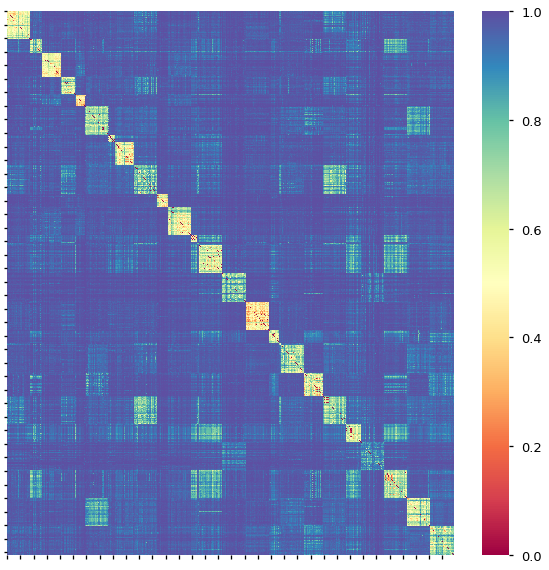

In [65]:
plt.figure(figsize = (10,10))
sns.heatmap(data=S, cmap = 'Spectral').set(xticklabels=[],yticklabels=[])

In [150]:
from sklearn.cluster import DBSCAN

In [151]:
clustering_model = DBSCAN(metric = "cosine")
clustering_model.fit(tfidf_matrix)
labels = clustering_model.labels_

In [152]:
df_labels = pd.DataFrame(labels, columns = ['label']) 
print(df_labels)

      label
0         0
1         0
2         0
3         0
4        -1
...     ...
1925     -1
1926     31
1927     -1
1928     -1
1929     -1

[1930 rows x 1 columns]


In [153]:
print(df_labels.value_counts())   #около 30% статей ушли в шумы

label
-1       562
 20      100
 0        91
 16       85
 3        83
 18       83
 23       77
 30       72
 22       71
 9        65
 6        62
 28       56
 31       55
 27       53
 4        50
 15       45
 5        40
 19       36
 11       36
 21       31
 1        25
 17       24
 8        24
 29       23
 25       18
 12       18
 13       10
 24        8
 10        7
 7         6
 14        5
 2         5
 26        4
dtype: int64


In [154]:
pd.crosstab(df.loc[:, 'class'], labels)
df

,text,date,event,class
0,петербург проходить митинг против передача иса...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
1,москва январь ситуация передача исаакиевский с...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
2,аргумент факт москва январь оппозиция провожат...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
3,новость топ москва январь акция против передач...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
4,газета москва январь московский патриархия про...,2017-01-10,Передача РПЦ Исаакиевского собора,Внутренняя политика РФ
...,...,...,...,...
1925,москва сентябрь кандидат депутат москва покуса...,2017-09-10,Единый день голосования,Внутренняя политика РФ
1926,москва сентябрь избирком оценивать явка выборы...,2017-09-10,Единый день голосования,Внутренняя политика РФ
1927,москва сентябрь кандидат столичный депутат пож...,2017-09-10,Единый день голосования,Внутренняя политика РФ
1928,москва сентябрь медведев припоминать избранный...,2017-09-10,Единый день голосования,Внутренняя политика РФ


In [155]:
true_labels = df["class"]
#adjusted_rand_score(true_labels, labels)
true_labels

0       Внутренняя политика РФ
1       Внутренняя политика РФ
2       Внутренняя политика РФ
3       Внутренняя политика РФ
4       Внутренняя политика РФ
                 ...          
1925    Внутренняя политика РФ
1926    Внутренняя политика РФ
1927    Внутренняя политика РФ
1928    Внутренняя политика РФ
1929    Внутренняя политика РФ
Name: class, Length: 1930, dtype: object